# Lab 3a

In [209]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import *
import scipy
from qutip import *

In [210]:
''' 
Some functions used later
'''

def qwp_cp_h(x, x0, mag):
    #horizontal polarization amplitude
    C = np.cos(x-x0)
    S = np.sin(x-x0)
    av = -1j
    ah_out = np.sqrt(1/2)*(C**2 -1j*S**2 + (1 + 1j)*C*S*av)
    return mag*np.absolute(ah_out)**2

def qwp_cp_v(x, x0, mag):
    #horizontal polarization amplitude
    C = np.cos(x-x0)
    S = np.sin(x-x0)
    av = -1j
    av_out = np.sqrt(1/2)*((-1j*C**2 + (S**2))*av + (1 + 1j)*C*S)
    return mag*np.absolute(av_out)**2



def qwp_ep_h(x, a, b, x0, mag, offset):
    #horizontal polarization amplitude
    C = np.cos(x-x0)
    S = np.sin(x-x0)
    ah = np.mod(a,1)
    av = np.exp(1j*b)*(np.sqrt(1 - ah**2))
    ah_out = np.sqrt(1/2)*((C**2 -1j*S**2)*ah + (1 + 1j)*C*S*av)
    return mag*np.absolute(ah_out)**2 + 0.2*np.sin(offset)

def qwp_ep_v(x, a, b, x0, mag, offset):
    #horizontal polarization amplitude
    C = np.cos(x-x0)
    S = np.sin(x-x0)
    ah = np.mod(a,1)
    av = np.exp(1j*b)*(np.sqrt(1 - ah**2))
    av_out = np.sqrt(1/2)*((-1j*C**2 + (S**2))*av + (1 + 1j)*C*S*ah)
    return mag*np.absolute(av_out)**2 + 0.2*np.sin(offset)

def hwp_ep_h(x, a, b, x0, mag, offset):
    #horizontal polarization amplitude
    C = np.cos(2*x-2*x0)
    S = np.sin(2*x-2*x0)
    ah = np.sin(a)
    av = np.exp(1j*b)*(np.cos(a))
    ah_out = C*ah + S*av
    return mag*np.absolute(ah_out)**2 + 0.2*np.sin(offset)

def hwp_ep_v(x, a, b, x0, mag, offset):
    #vertical polarization amplitude
    C = np.cos(2*x-2*x0)
    S = np.sin(2*x-2*x0)
    ah = np.sin(a)
    av = np.exp(1j*b)*(np.cos(a))
    av_out = S*ah - C*av
    return mag*np.absolute(av_out)**2 + 0.2*np.sin(offset)


'''
(a) 1- photon density matrix
'''


''' 
order : [ch, cv, cp, cm, cr, cl]
'''
def density_matrix_one_photon(measutrement_list:list):
    

    T0 = 1
    try:
        Tx = (measutrement_list[2] - measutrement_list[3])/(measutrement_list[2] + measutrement_list[3])
        Ty = (measutrement_list[4] - measutrement_list[5])/(measutrement_list[4] + measutrement_list[5])
        Tz = (measutrement_list[0] - measutrement_list[1])/(measutrement_list[0] + measutrement_list[1])
    
        rho = 0.5*(identity(2) + Tx*sigmax() + Ty*sigmay() + Tz*sigmaz() )

        _return_array = np.array([[rho[0][0][0],rho[0][0][1]],[rho[1][0][0],rho[1][0][1]]]).reshape((2,2))
        return _return_array
    except:
        print("measurement list is not in correct format")



'''
(b) 2- photon density matrix
'''


''' 
order : [[c_hh, c_hv, c_hp, c_hm, c_hr, c_hl], 
        [c_vh, c_vv, c_vp, c_vm, c_vr, c_vl],
        [c_ph, c_pv, c_pp, c_pm, c_pr, c_pl],
        [c_mh, c_mv, c_mp, c_mm, c_mr, c_ml],
        [c_rh, c_rv, c_rp, c_rm, c_rr, c_rl],
        [c_lh, c_lv, c_lp, c_lm, c_lr, c_ll]]
'''
def density_matrix_two_photon(measutrement_list:list):
    

    T00 = 1
    try:

        ''' 
        pauli basis in np array
        '''

        sigma_x = np.array([[0,1],[1,0]]).reshape((2,2))
        sigma_y = np.array([[0,-1j],[1j,0]]).reshape((2,2))
        sigma_z = np.array([[1,0],[0,-1]]).reshape((2,2))
        sigma_i = np.identity(2)


        ''' 
        get counts from input list
        '''
        c_hh, c_hv, c_hp, c_hm, c_hr, c_hl = measutrement_list[0]
        c_vh, c_vv, c_vp, c_vm, c_vr, c_vl = measutrement_list[1]
        c_ph, c_pv, c_pp, c_pm, c_pr, c_pl = measutrement_list[2]
        c_mh, c_mv, c_mp, c_mm, c_mr, c_ml = measutrement_list[3]
        c_rh, c_rv, c_rp, c_rm, c_rr, c_rl = measutrement_list[4]
        c_lh, c_lv, c_lp, c_lm, c_lr, c_ll = measutrement_list[5]



        ''' 
        set values of matrix coefficeints as defined in the text
        '''
        T0x = 1/3*((c_pp - c_pm + c_mp - c_mm)/(c_pp + c_pm + c_mp +c_mm) + (c_rp - c_rm + c_lp - c_lm)/(c_rp + c_rm + c_lp + c_lm) + (c_hp - c_hm + c_vp - c_vm)/(c_hp + c_hm + c_vm + c_vp) )
        Txx = (c_pp - c_pm - c_mp +c_mm)/(c_pp + c_pm + c_mp +c_mm)
        Txy = (c_pr - c_pl - c_mr +c_ml)/ (c_pr + c_pl + c_mr + c_ml)
        Txz = (c_ph - c_pv - c_mh + c_mv)/ (c_ph + c_pv + c_mh + c_mv)
        Tx0 = 1/3*((c_pp + c_pm - c_mp - c_mm)/(c_pp + c_pm + c_mp +c_mm) + (c_pr + c_pl - c_mr - c_ml)/ (c_pr + c_pl + c_mr + c_ml)+ (c_ph + c_pv - c_mh - c_mv)/ (c_ph + c_pv + c_mh + c_mv))

        T0y = 1/3*((c_pr - c_pl + c_mr - c_ml)/ (c_pr + c_pl + c_mr + c_ml)+(c_rr - c_rl + c_lr - c_ll)/(c_rr + c_rl + c_lr +c_ll)+(c_hr - c_hl + c_vr - c_vl)/(c_hr + c_hl + c_vr + c_vl))
        Tyy = (c_rr - c_rl - c_lr +c_ll)/(c_rr + c_rl + c_lr +c_ll)    
        Tyx = (c_rp - c_rm - c_lp + c_lm)/(c_rp + c_rm + c_lp + c_lm)
        Tyz = (c_rh - c_rv - c_lh + c_lv)/ (c_rh + c_rv + c_lh + c_lv)
        Ty0 = 1/3*((c_rr + c_rl - c_lr - c_ll)/(c_rr + c_rl + c_lr +c_ll) + (c_rp + c_rm - c_lp - c_lm)/(c_rp + c_rm + c_lp + c_lm) + (c_rh + c_rv - c_lh - c_lv)/ (c_rh + c_rv + c_lh + c_lv))

        T0z = 1/3*((c_ph - c_pv + c_mh - c_mv)/ (c_ph + c_pv + c_mh + c_mv)+(c_rh - c_rv + c_lh - c_lv)/ (c_rh + c_rv + c_lh + c_lv)+(c_hh - c_hv + c_vh - c_vv)/(c_hh + c_hv + c_vh + c_vv)) 
        Tzz = (c_hh - c_hv - c_vh + c_vv)/(c_hh + c_hv + c_vh + c_vv)
        Tzx = (c_hp - c_hm - c_vp + c_vm)/(c_hp + c_hm + c_vm + c_vp)
        Tzy = (c_hr - c_hl - c_vr + c_vl)/(c_hr + c_hl + c_vr + c_vl)
        Tz0 = 1/3*((c_hh + c_hv - c_vh - c_vv)/(c_hh + c_hv + c_vh + c_vv)+(c_hp + c_hm - c_vp - c_vm)/(c_hp + c_hm + c_vm + c_vp)+(c_hr + c_hl - c_vr - c_vl)/(c_hr + c_hl + c_vr + c_vl))


        ''' 
        return value
        '''
        _return_array = 1/4*(np.tensordot(sigma_i,sigma_i, axes=0)+ T0x*np.tensordot(sigma_i,sigma_x, axes=0) + Txx*np.tensordot(sigma_x,sigma_x, axes=0) + Tyx*np.tensordot(sigma_y,sigma_x, axes=0) + Tzx*np.tensordot(sigma_z,sigma_x, axes=0) + Tx0*np.tensordot(sigma_x,sigma_i, axes=0) + T0y*np.tensordot(sigma_i,sigma_y, axes=0) + Txy*np.tensordot(sigma_x,sigma_y, axes=0) + Tyy*np.tensordot(sigma_y,sigma_y, axes=0) + Tzy*np.tensordot(sigma_z,sigma_y, axes=0) + Ty0*np.tensordot(sigma_y,sigma_i, axes=0) + T0z*np.tensordot(sigma_i,sigma_z, axes=0) + Txz*np.tensordot(sigma_x,sigma_z, axes=0) + Tyz*np.tensordot(sigma_y,sigma_z, axes=0) + Tzz*np.tensordot(sigma_z,sigma_z, axes=0) + Tz0*np.tensordot(sigma_z,sigma_i, axes=0))

        return _return_array.reshape((4,4))

    except:
        print("measurement list is not in correct format")




------------------
       3.2       
------------------



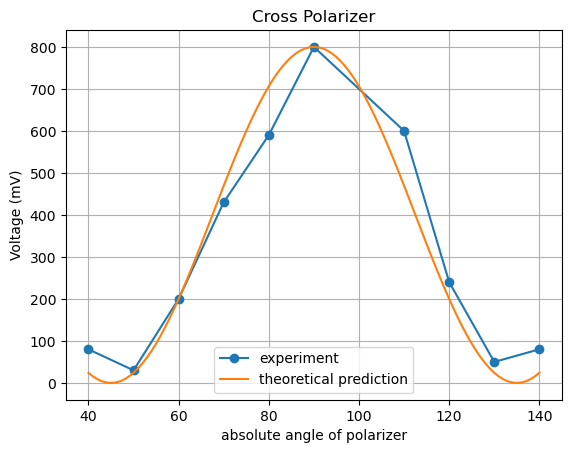

In [105]:
print("------------------\n       3.2       \n------------------\n" )
fs1_0 = [80, 30, 200, 430, 590, 800, 600, 240, 50, 80]
angle_abs_0 = [40, 50, 60, 70, 80, 90, 110, 120, 130, 140]

fig, ax = plt.subplots(1)
ax.grid()
ax.plot(angle_abs_0,fs1_0,'o-', label="experiment")
ax.set_xlabel("absolute angle of polarizer")
ax.set_ylabel("Voltage (mV)")
ax.set_title("Cross Polarizer")
ax.plot(x, f_x(x, 90, 4*np.pi/360 , 800), label="theoretical prediction")
ax.legend()

def f_x(x, x0,x1,  mag):
    return mag*(np.cos(x1*(x-x0))**2)



x = np.arange(40,141,1)



------------------
       3.3       
------------------

[ 8.93325328e-01 -5.37727530e+05 -2.68944569e-01  8.03051355e+00
  2.03752325e+01]


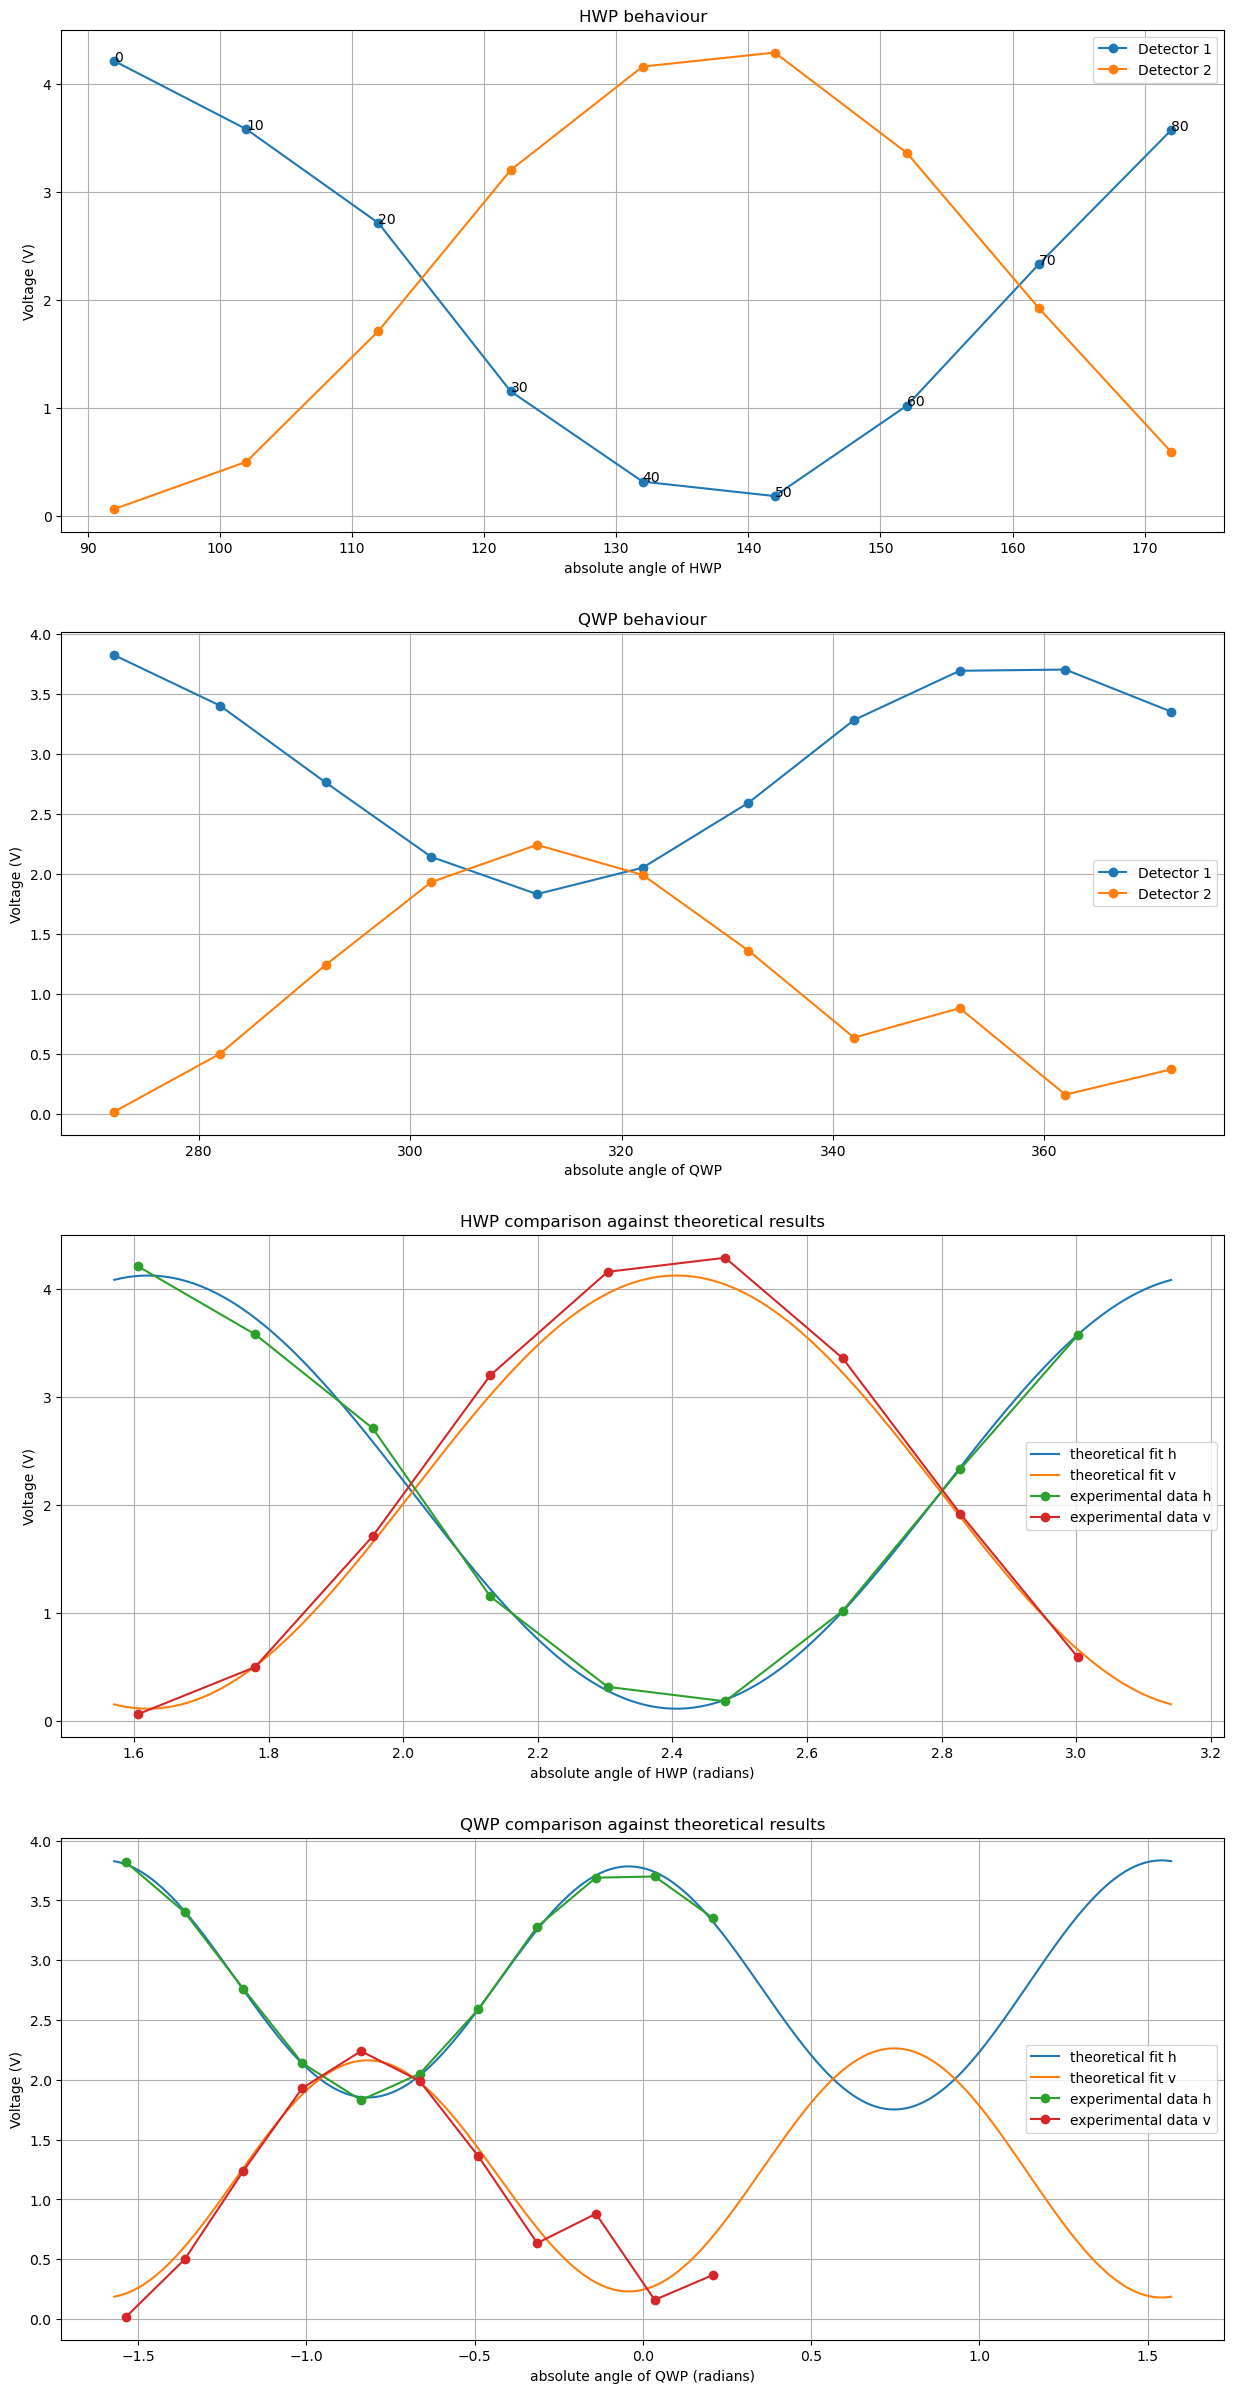

In [157]:
print("\n------------------\n       3.3       \n------------------\n" )
fs1_zero = -0.2
fs2_zero = -0.04

fs1_hwp = [4.012, 3.38, 2.51, 0.952, 0.114, -0.02, 0.818, 2.13, 3.37]
fs2_hwp = [0.0198, 0.458, 1.67, 3.16, 4.12, 4.25, 3.32, 1.88, 0.55]
fs1_hwp = [x - fs1_zero for x in fs1_hwp]
fs2_hwp = [x - fs2_zero for x in fs2_hwp]
angle_abs_hwp = [92, 102, 112, 122, 132, 142, 152, 162, 172]
angle_rel_hwp = [0, 10, 20, 30, 40, 50, 60, 70, 80]

fig, ax = plt.subplots(4,1,figsize=(15,30))
ax[0].grid()
ax[0].plot(angle_abs_hwp, fs1_hwp, 'o-', label = 'Detector 1')
ax[0].plot(angle_abs_hwp, fs2_hwp, 'o-', label = 'Detector 2')
ax[0].set_xlabel("absolute angle of HWP")
ax[0].set_ylabel("Voltage (V)")
ax[0].legend()
for _angle, _an, _fs1 in zip(angle_rel_hwp, angle_abs_hwp, fs1_hwp) :
    ax[0].annotate(_angle, (_an, _fs1))

fs1_qwp = [3.82, 3.4, 2.76, 2.14, 1.83, 2.05, 2.59, 3.28,3.69, 3.70, 3.35]
fs2_qwp = [0.018, 0.5, 1.24, 1.93, 2.24, 1.99, 1.36, 0.635, 0.88, 0.16, 0.37]
angle_abs_qwp = np.mod(np.arange(272, 382, 10).tolist(), 390).tolist()

ax[1].grid()
ax[1].plot(angle_abs_qwp, fs1_qwp, 'o-', label = 'Detector 1')
ax[1].plot(angle_abs_qwp, fs2_qwp, 'o-', label = 'Detector 2')
ax[1].set_xlabel("absolute angle of QWP")
ax[1].set_ylabel("Voltage (V)")
ax[1].legend()

ax[0].set_title("HWP behaviour")
ax[1].set_title("QWP behaviour")



test_angles = np.arange(np.pi/2, np.pi,0.01/2)
angle_abs_hwp_mod = [(x)*(2*np.pi)/360 for x in angle_abs_hwp]

popt, pcov = curve_fit(hwp_ep_h, angle_abs_hwp_mod, fs1_hwp)
ax[2].plot(test_angles,hwp_ep_h(test_angles,*popt), label = "theoretical fit h")
ax[2].plot(test_angles,hwp_ep_v(test_angles,*popt), label = "theoretical fit v")
ax[2].plot(angle_abs_hwp_mod, fs1_hwp,'o-', label = "experimental data h")
ax[2].plot(angle_abs_hwp_mod, fs2_hwp,'o-', label = "experimental data v")
ax[2].legend()
ax[2].grid()
ax[2].set_xlabel("absolute angle of HWP (radians)")
ax[2].set_ylabel("Voltage (V)")


test_angles = np.arange(-np.pi/2, np.pi/2,0.01/2)
angle_abs_qwp_mod = [(x-360)*(2*np.pi)/360 for x in angle_abs_qwp]

popt, pcov = curve_fit(qwp_ep_h, angle_abs_qwp_mod, fs1_qwp)
ax[3].plot(test_angles,qwp_ep_h(test_angles,*popt), label = "theoretical fit h")
def qwp_ep_v_offset(x,  offset):
    C = np.cos(x-popt[2])
    S = np.sin(x-popt[2])
    ah = np.mod(popt[0],1)
    av = np.exp(1j*popt[1])*(np.sqrt(1 - ah**2))
    av_out = np.sqrt(1/2)*((-1j*C**2 + (S**2))*av + (1 + 1j)*C*S*ah)
    return popt[3]*np.absolute(av_out)**2 + 0.2*np.sin(offset)

popt2, pcov2 = curve_fit(qwp_ep_v_offset, angle_abs_qwp_mod, fs2_qwp)
ax[3].plot(test_angles,qwp_ep_v_offset(test_angles,*popt2), label = "theoretical fit v")
ax[3].plot(angle_abs_qwp_mod, fs1_qwp,'o-', label = "experimental data h")
ax[3].plot(angle_abs_qwp_mod, fs2_qwp,'o-', label = "experimental data v")
ax[3].legend()
ax[3].grid()
ax[3].set_xlabel("absolute angle of QWP (radians)")
ax[3].set_ylabel("Voltage (V)")

ax[2].set_title("HWP comparison against theoretical results")
ax[3].set_title("QWP comparison against theoretical results")
print(popt)


------------------
       3.4       
------------------


-------
   2        
-------



The polarization of the input beam can be charachterised by the Jones vector: 
[[0.66776501+0.j        ]
 [0.01740502-0.74416864j]]


The elipsicity of the light can be given by [0.89708489]


The value of \alpha_0 is 5.312497827769422

-------
   3        
-------



The polarization of the input beam can be charachterised by the Jones vector: 
[[0.78624367+0.j       ]
 [0.40190942-0.4693503j]]


The elipsicity of the light can be given by [1.27241074]




Text(0.5, 1.0, 'Verifying Non-Circular Polarized Beam with HWP (Theoretical)')

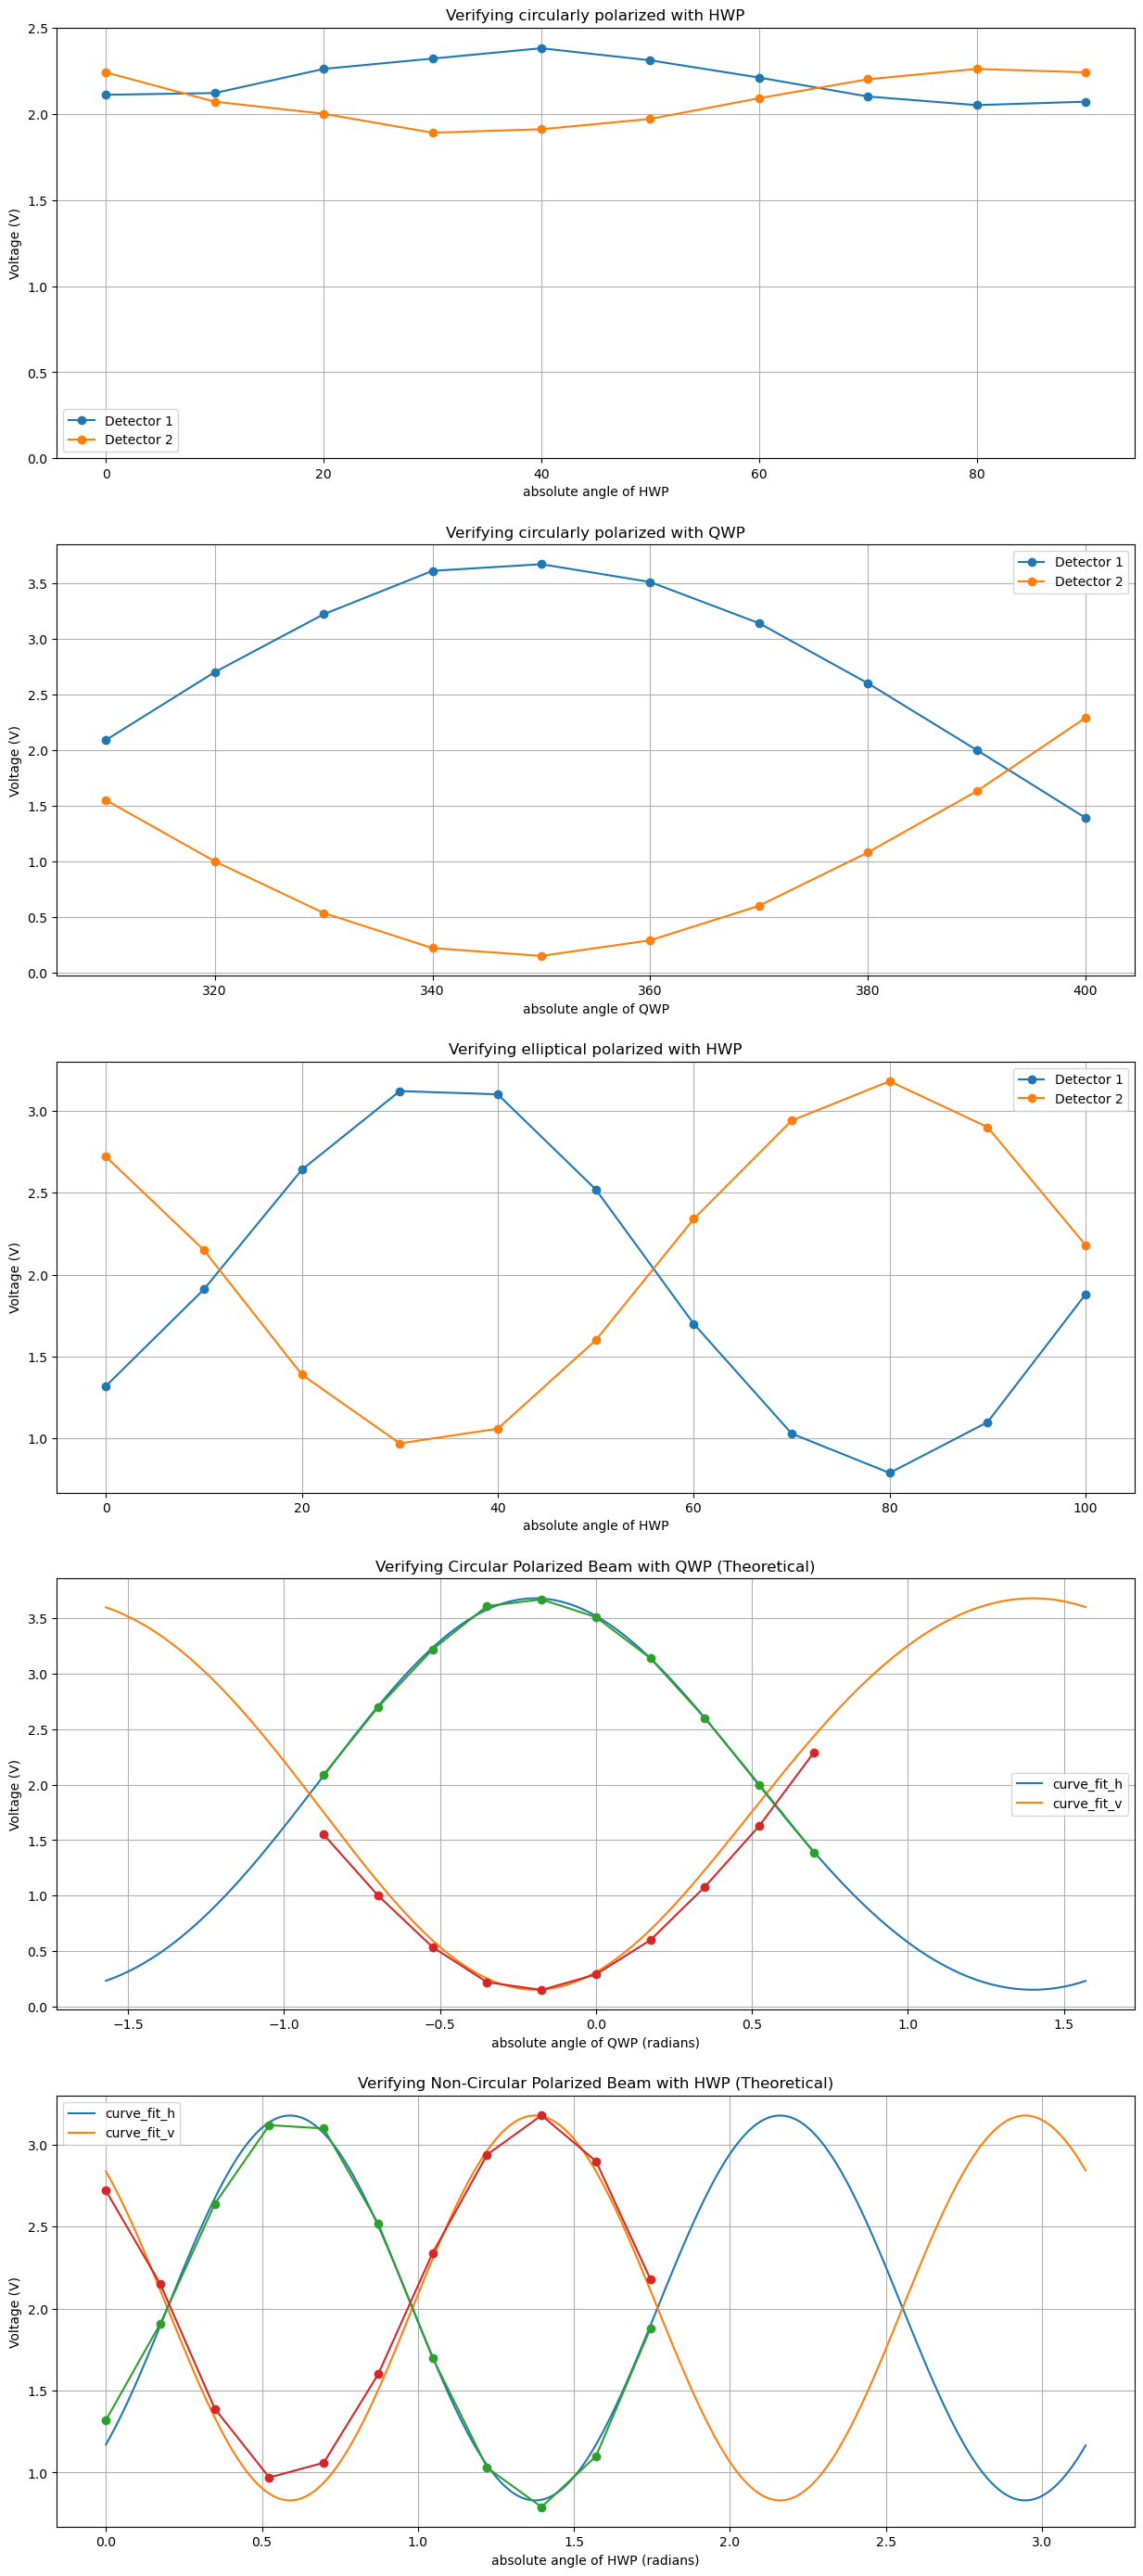

In [272]:
print("\n------------------\n       3.4       \n------------------\n" )

fs1_1 = [1.91, 1.92, 2.06, 2.12, 2.18, 2.11, 2.01, 1.9, 1.85, 1.87]
fs2_1 = [2.2, 2.03, 1.96, 1.85, 1.87, 1.93, 2.05, 2.16, 2.22, 2.2]
fs1_1 = [x - fs1_zero for x in fs1_1]
fs2_1 = [x - fs2_zero for x in fs2_1]
angle_abs_1 = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

fig, ax = plt.subplots(5,1,figsize = (15,35))

ax[0].grid()
ax[0].plot(angle_abs_1, fs1_1, 'o-', label = 'Detector 1')
ax[0].plot(angle_abs_1, fs2_1, 'o-', label = 'Detector 2')
ax[0].set_xlabel("absolute angle of HWP")
ax[0].set_ylabel("Voltage (V)")
ax[0].legend()
ax[0].set_yticks(np.arange(0, 3, 0.5))


fs1_2 = [2.09, 2.7, 3.22, 3.61, 3.67, 3.51, 3.14, 2.6, 2, 1.39]
fs2_2 = [1.55, 1, 0.536, 0.22, 0.15, 0.29, 0.6, 1.08, 1.63, 2.29]
angle_abs_2 = [310, 320, 330, 340, 350, 360, 370, 380, 390, 400]

ax[1].grid()
ax[1].plot(angle_abs_2, fs1_2, 'o-', label = 'Detector 1')
ax[1].plot(angle_abs_2, fs2_2, 'o-', label = 'Detector 2')
ax[1].set_xlabel("absolute angle of QWP")
ax[1].set_ylabel("Voltage (V)")
ax[1].legend()

fs1_3 = [1.32, 1.91, 2.64, 3.12, 3.1, 2.52, 1.7, 1.03, 0.79, 1.1, 1.88]
fs2_3 = [2.72, 2.15, 1.39, 0.97, 1.06, 1.6, 2.34, 2.94, 3.18, 2.9, 2.18]
angle_abs_3 = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

ax[2].grid()
ax[2].plot(angle_abs_3, fs1_3, 'o-', label = 'Detector 1')
ax[2].plot(angle_abs_3, fs2_3, 'o-', label = 'Detector 2')
ax[2].set_xlabel("absolute angle of HWP")
ax[2].set_ylabel("Voltage (V)")
ax[2].legend()

ax[0].set_title("Verifying circularly polarized with HWP")
ax[1].set_title("Verifying circularly polarized with QWP")
ax[2].set_title("Verifying elliptical polarized with HWP")




test_angles = np.arange(-1*np.pi/2, np.pi/2,0.01/2)
angle_abs_2_mod = [(x-360)*(2*np.pi)/360 for x in angle_abs_2]

print("\n-------\n   2        \n-------\n" )

popt, pcov = curve_fit(qwp_ep_h, angle_abs_2_mod, fs1_2)
print("\n\nThe polarization of the input beam can be charachterised by the Jones vector: ")
input_jones = np.array([np.mod(popt[0],1),np.exp(1j*popt[1])*(np.sqrt(1 - np.mod(popt[0],1)**2))]).reshape(2,1)
print(input_jones)
print("\n")
print("The elipsicity of the light can be given by "+str(np.absolute(input_jones[0])/np.absolute(input_jones[1])))
print("\n")


print("The value of \\alpha_0 is " + str(np.mod(popt[2],2*np.pi)))


ax[3].plot(test_angles,qwp_ep_h(test_angles,*popt), label ="curve_fit_h")
ax[3].plot(test_angles,qwp_ep_v(test_angles,*popt), label ="curve_fit_v")
ax[3].plot(angle_abs_2_mod,fs1_2,'o-')
ax[3].plot(angle_abs_2_mod,fs2_2,'o-')
ax[3].legend()
ax[3].grid()
ax[3].set_xlabel("absolute angle of QWP (radians)")
ax[3].set_ylabel("Voltage (V)")




test_angles = np.arange(0, np.pi,0.01)
angle_abs_3_mod = [(x)*(2*np.pi)/360 for x in angle_abs_3]
popt, pcov = curve_fit(hwp_ep_h, angle_abs_3_mod, fs1_3)


print("\n-------\n   3        \n-------\n" )
print("\n\nThe polarization of the input beam can be charachterised by the Jones vector: ")
input_jones = np.array([np.mod(popt[0],1),np.exp(1j*popt[1])*(np.sqrt(1 - np.mod(popt[0],1)**2))]).reshape(2,1)
print(input_jones)
print("\n")
print("The elipsicity of the light can be given by "+str(np.absolute(input_jones[0])/np.absolute(input_jones[1])))



print("\n")


def qwp_ep_v_offset(x,  offset):
    C = np.cos(x-popt[2])
    S = np.sin(x-popt[2])
    ah = np.mod(popt[0],1)
    av = np.exp(1j*popt[1])*(np.sqrt(1 - ah**2))
    av_out = np.sqrt(1/2)*((-1j*C**2 + (S**2))*av + (1 + 1j)*C*S*ah)
    return popt[3]*np.absolute(av_out)**2 + offset


ax[4].plot(test_angles,hwp_ep_h(test_angles,*popt), label ="curve_fit_h")
popt2, pcov2 = curve_fit(qwp_ep_v_offset, angle_abs_3_mod, fs2_3)


ax[4].plot(test_angles,hwp_ep_v(test_angles,*popt), label ="curve_fit_v")
ax[4].plot(angle_abs_3_mod,fs1_3,'o-')
ax[4].plot(angle_abs_3_mod,fs2_3,'o-')
ax[4].legend()
ax[4].grid()
ax[4].set_xlabel("absolute angle of HWP (radians)")
ax[4].set_ylabel("Voltage (V)")
ax[3].set_title("Verifying Circular Polarized Beam with QWP (Theoretical)")
ax[4].set_title("Verifying Non-Circular Polarized Beam with HWP (Theoretical)")


------------------
       3.5       
------------------



The polarization of the input beam can be charachterised by the Jones vector: 
[[ 0.59036645+0.j        ]
 [-0.69326548+0.41334058j]]

 To check if this is indeed required polarization, we rotate it back by 45 degrees, we get 
[[-0.0727606 +0.29227592j]
 [-0.90766484+0.29227592j]]


now we calculate the ellipsicity
ah = [0.30119648] av = [0.9535621] av/ah = [3.1659138]


Thus we generate an elliptical polarized light of ellipsicity 3.1 instead of 2.5, which is due to experimental and alignment errors.


Text(0.5, 1.0, 'Creation of an arbitrary polarization of light.')

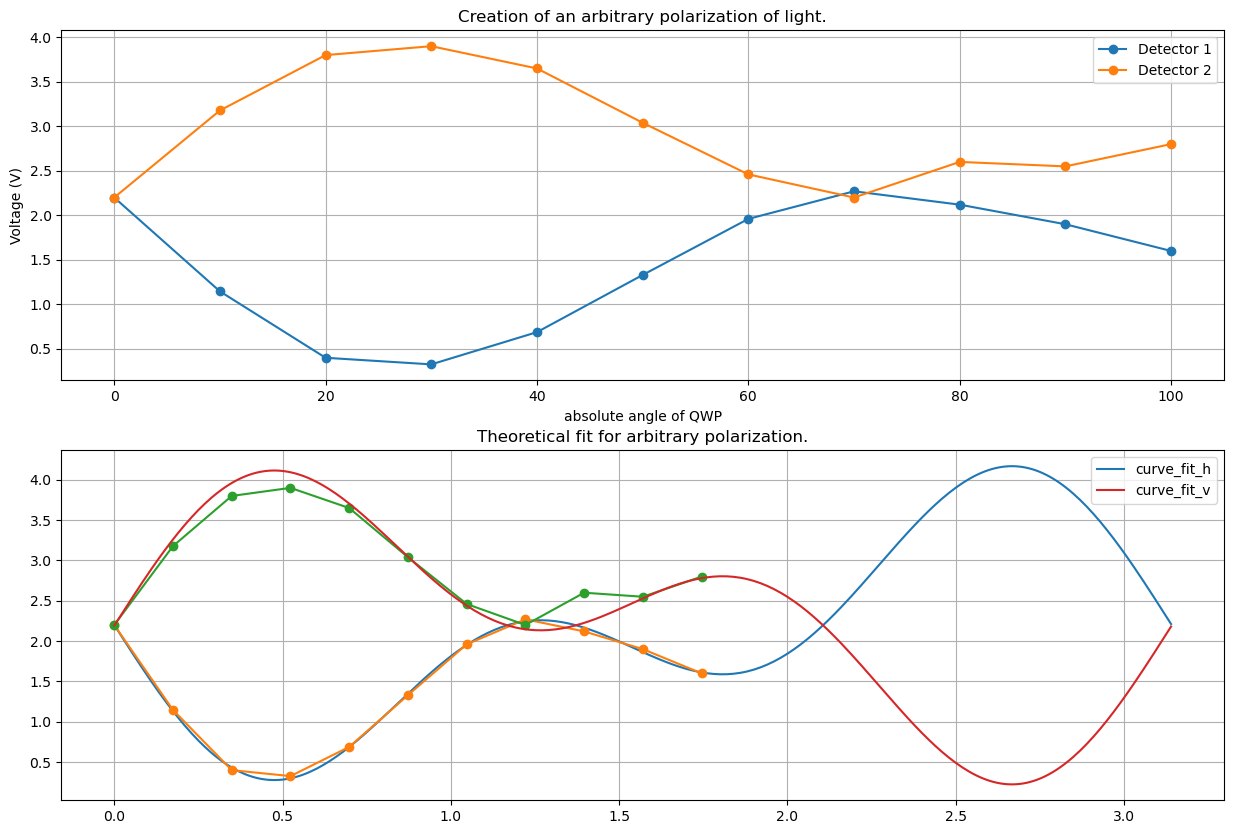

In [283]:
print("\n------------------\n       3.5       \n------------------\n" )

#fs1_5 = [1.71, 3.13, 4.24, 4.36, 3.43, 2.09, 0.74, 0.12, 0.53, 1.93, 3.22]
#fs2_5 = [2.58, 1.32, 0.32, 0.2, 1.06, 2.28, 3.49, 4.05, 3.72, 2.44, 1.26]
#angle_abs_5 = [0, 10, 20, 30, 40, 45, 50, 60, 70, 80, 90]

fs1_5 = [2.2, 1.146, 0.4, 0.326, 0.688, 1.33, 1.96, 2.27, 2.12, 1.9, 1.6]
fs2_5 = [2.2,3.178,3.8,3.9,3.65,3.04,2.46,2.20,2.6,2.55,2.8]
#fs1_5 = [1.77, 2.66, 3.39,   3.61, 3.24, 2.5, 1.84, 1.42, 1.47, 1.94, 2.51]
#fs2_5 = [2.61, 1.75,    1.09, 0.871, 1.17, 1.88, 2.56, 2.93,2.93,2.48,1.96]
angle_abs_5 = [0, 10, 20, 30, 40, 50, 60,70,80,90,100]


fig, ax = plt.subplots(2, figsize = (15,10))

ax[0].grid()
ax[0].plot(angle_abs_5, fs1_5, 'o-', label = 'Detector 1')
ax[0].plot(angle_abs_5, fs2_5, 'o-', label = 'Detector 2')
ax[0].set_xlabel("absolute angle of QWP")
ax[0].set_ylabel("Voltage (V)")
ax[0].legend()


test_angles = np.arange(0, np.pi,0.01)
angle_abs_5_mod = [(x)*(2*np.pi)/360 for x in angle_abs_5]

guess = [ np.sqrt(16/17), -1*np.pi/2,  0,  4, 0]
popt, pcov = curve_fit(qwp_ep_h, angle_abs_5_mod, fs1_5, guess)
print("\n\nThe polarization of the input beam can be charachterised by the Jones vector: ")
input_jones = np.array([np.mod(popt[0],1),np.exp(1j*popt[1])*(np.sqrt(1 - np.mod(popt[0],1)**2))]).reshape(2,1)
print(input_jones)
print("\n To check if this is indeed required polarization, we rotate it back by 45 degrees, we get ")
r_45 = (1/np.sqrt(2)) * (np.array([[1,1],[-1,1]]).reshape(2,2))
rotated_jones = r_45 @ input_jones
print(rotated_jones)
print("\n\nnow we calculate the ellipsicity")
print("ah = "+str(np.absolute(rotated_jones[0])) + " av = "+str(np.absolute(rotated_jones[1])) + " av/ah = "+ str(np.absolute(rotated_jones[1])/np.absolute(rotated_jones[0])))
print("\n\nThus we generate an elliptical polarized light of ellipsicity 3.1 instead of 2.5, which is due to experimental and alignment errors.")
#print("The value of \\alpha_0 is " + str(popt[2]))
#print(popt)


ax[1].plot(test_angles,qwp_ep_h(test_angles,*popt), label ="curve_fit_h")
ax[1].plot(angle_abs_5_mod,fs1_5,'o-')
ax[1].plot(angle_abs_5_mod,fs2_5,'o-')
ax[1].legend()
ax[1].grid()


popt2, pcov2 = curve_fit(qwp_ep_v_offset, angle_abs_5_mod, fs2_5)


ax[1].plot(test_angles,qwp_ep_v_offset(test_angles,*popt2), label ="curve_fit_v")
ax[1].legend()
ax[1].set_title("Theoretical fit for arbitrary polarization.")
ax[0].set_title("Creation of an arbitrary polarization of light.")



------------------
       3.6       
------------------



Text(0.5, 1.0, 'Optical Isolator')

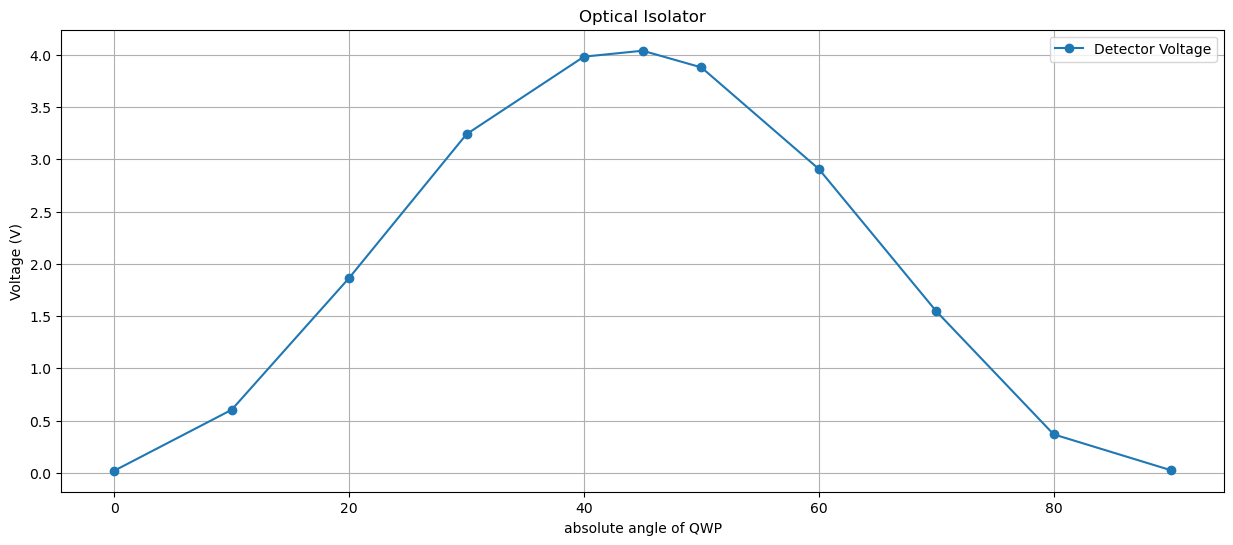

In [7]:
print("\n------------------\n       3.6       \n------------------\n" )

fs_6 = [0.02, 0.6033, 1.8644, 3.2408, 3.9829, 4.0398, 3.8802, 2.9083, 1.5469, 0.3682, 0.0243]
angle_abs_6 = [0, 10, 20, 30, 40, 45, 50, 60, 70, 80, 90]

fig, ax = plt.subplots(1, figsize = (15,6))

ax.grid()
ax.plot(angle_abs_6, fs_6, 'o-', label = 'Detector Voltage')
ax.set_xlabel("absolute angle of QWP")
ax.set_ylabel("Voltage (V)")
ax.legend()
ax.set_title("Optical Isolator")


In [8]:
''' 
TEMP
'''

fs_6 = [0.02, 0.6033, 1.8644, 3.2408, 3.9829, 4.0398, 3.8802, 2.9083, 1.5469, 0.3682, 0.0243]
angle_abs_6 = [0, 10, 20, 30, 40, 45, 50, 60, 70, 80, 90]


angle_rel_hwp = [0, 10, 20, 30, 40, 50, 60, 70, 80]

fs1_qwp = [3.82, 3.4, 2.76, 2.14, 1.83, 2.05, 2.59, 3.28,3.69, 3.70, 3.35]
fs2_qwp = [0.018, 0.5, 1.24, 1.93, 2.24, 1.99, 1.36, 0.635, 0.88, 0.16, 0.37]


out_string = ''
for _fs1, _aa in zip(fs_6, angle_abs_5):
    out_string = out_string + "$" + str(_aa) + "^o$" + " & "   + "$" + str(_fs1) + "\pm 0.1 $" + " \\\ \n"
print(out_string)

$0^o$ & $0.02\pm 0.1 $ \\ 
$10^o$ & $0.6033\pm 0.1 $ \\ 
$20^o$ & $1.8644\pm 0.1 $ \\ 
$30^o$ & $3.2408\pm 0.1 $ \\ 
$40^o$ & $3.9829\pm 0.1 $ \\ 
$45^o$ & $4.0398\pm 0.1 $ \\ 
$50^o$ & $3.8802\pm 0.1 $ \\ 
$60^o$ & $2.9083\pm 0.1 $ \\ 
$70^o$ & $1.5469\pm 0.1 $ \\ 
$80^o$ & $0.3682\pm 0.1 $ \\ 
$90^o$ & $0.0243\pm 0.1 $ \\ 



# 3b

--------------
     2(a)      
--------------



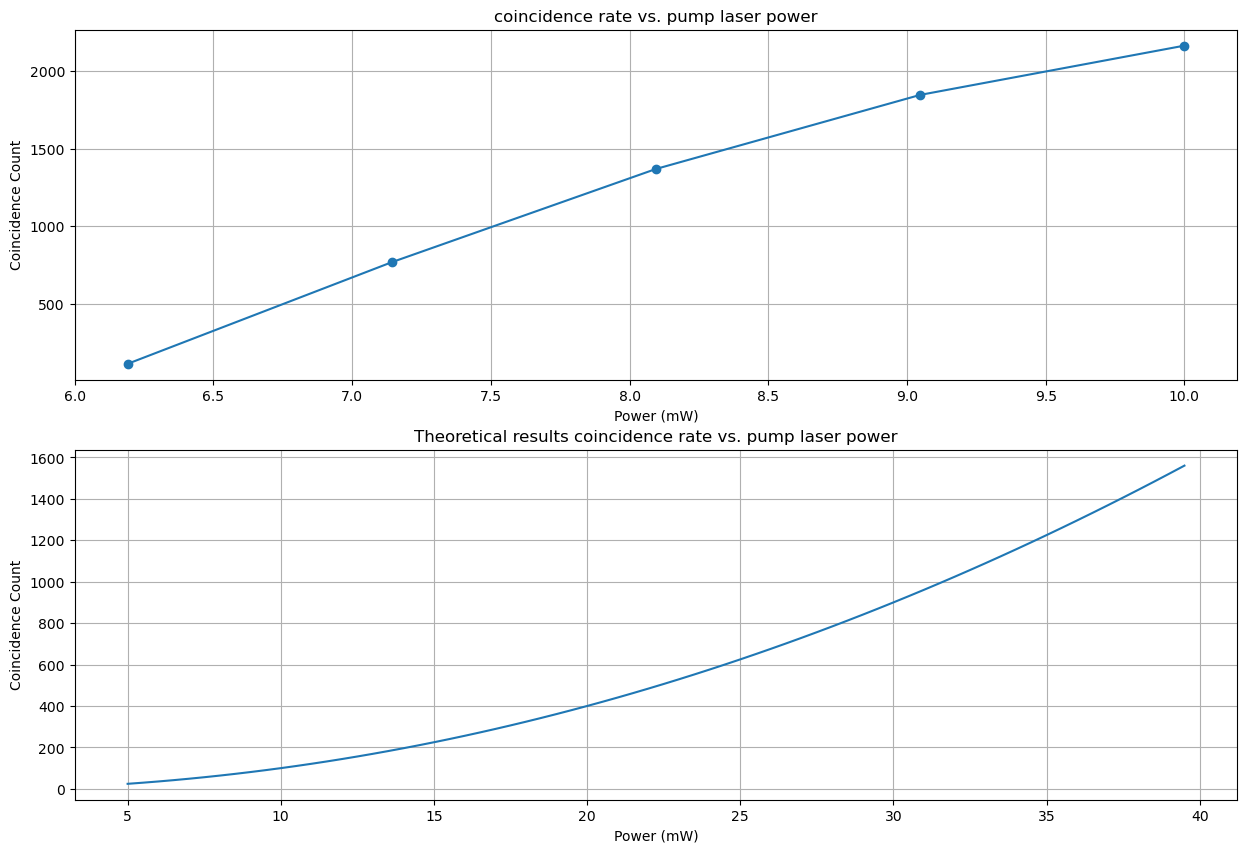

In [242]:
print("--------------\n     2(a)      \n--------------\n")

current = [26,	30,	34,	38,	42]

power = [x*10/42 for x in current]

count = [111,	767,	1369,	1847,	2165]

fig, ax = plt.subplots(2,figsize=(15,10))

ax[0].plot(power, count, 'o-')
ax[0].grid()
ax[0].set_title("coincidence rate vs. pump laser power")
ax[0].set_xlabel("Power (mW)")
ax[0].set_ylabel("Coincidence Count")

x_val = np.arange(5,40,0.5).tolist()
def output_power(x,mag,a):
    return mag*((x*np.tanh(0.5*x*a))**2)
popt, pcov = curve_fit(output_power, power, count)
output = [output_power(_x, 1,1) for _x in x_val]
ax[1].plot(x_val, output)
ax[1].set_xlabel("Power (mW)")
ax[1].set_title("Theoretical results coincidence rate vs. pump laser power")
ax[1].set_ylabel("Coincidence Count")
ax[1].grid()


--------------
    Part I      
--------------



/tmp/ipykernel_335/47733984.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(polarization)


Text(0.5, 1.0, 'Coincidence count rate')

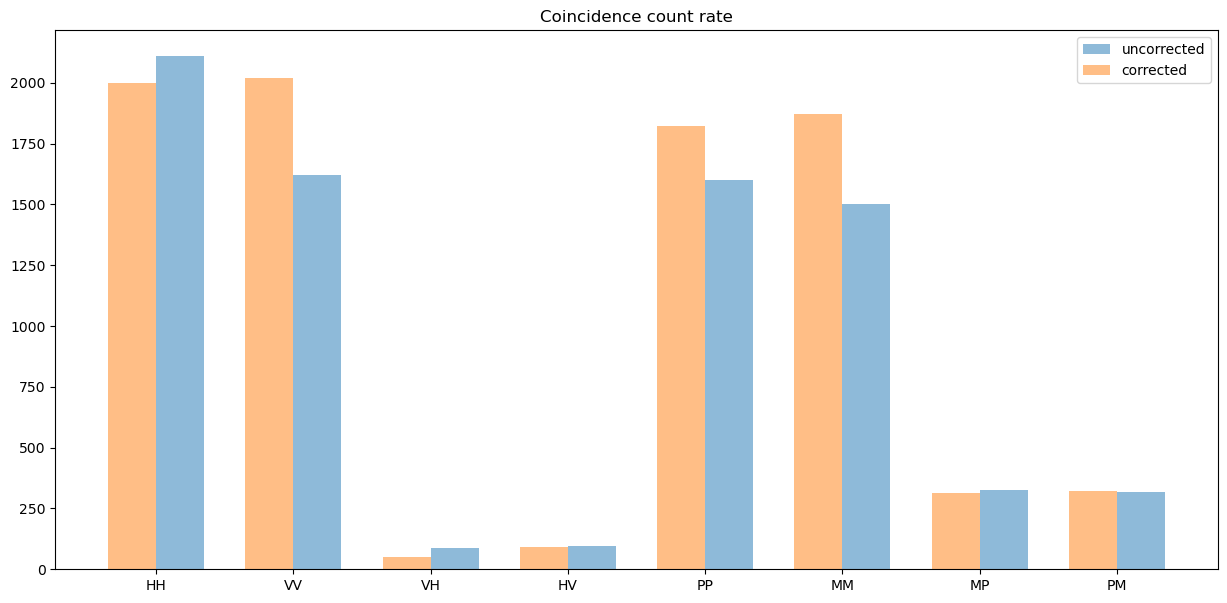

In [ ]:
print("--------------\n    Part I      \n--------------\n")
polarization = ["XX", "HH"	, "VV"	, "VH"	, "HV"	, "PP"	, "MM"	, "MP"	, "PM"	]
count = [2110, 1619, 88, 94, 1600, 1503, 324, 319]
count2 = [2000, 2018.00 , 51, 90, 1822, 1871, 312, 323]

x = np.arange(8)
width = 0.35

fig, ax = plt.subplots(1, figsize=(15,7))
ax.bar(x + width/2, count,width, alpha = 0.5, label = "uncorrected")
ax.bar(x - width/2, count2,width, alpha = 0.5, label = "corrected")
ax.set_xticklabels(polarization)
ax.legend()
ax.set_title("Coincidence count rate")


-------------
  Tomography  
-------------

-------------
   1-qubit  
-------------

[[0.57706093+0.j         0.07796742+0.34932593j]
 [0.07796742-0.34932593j 0.42293907+0.j        ]]


-------------
   2-qubit  
-------------

(0.33421+0j)		(-0.01924+0.19669j)	(-0.01924-0.19669j)	(0.14581+0j)
(0.03795+0.19641j)	(-0.07633+0.05222j)	(0.14857-0.27156j)	(-0.03221-0.0662j)
(0.03795-0.19641j)	(0.14857+0.27156j)	(-0.07633-0.05222j)	(-0.03221+0.0662j)
(0.26615+0j)		(-0.02957-0.11485j)	(-0.02957+0.11485j)	(0.25384+0j)


/tmp/ipykernel_335/1753705253.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(polarization)
/tmp/ipykernel_335/1753705253.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(polarization)


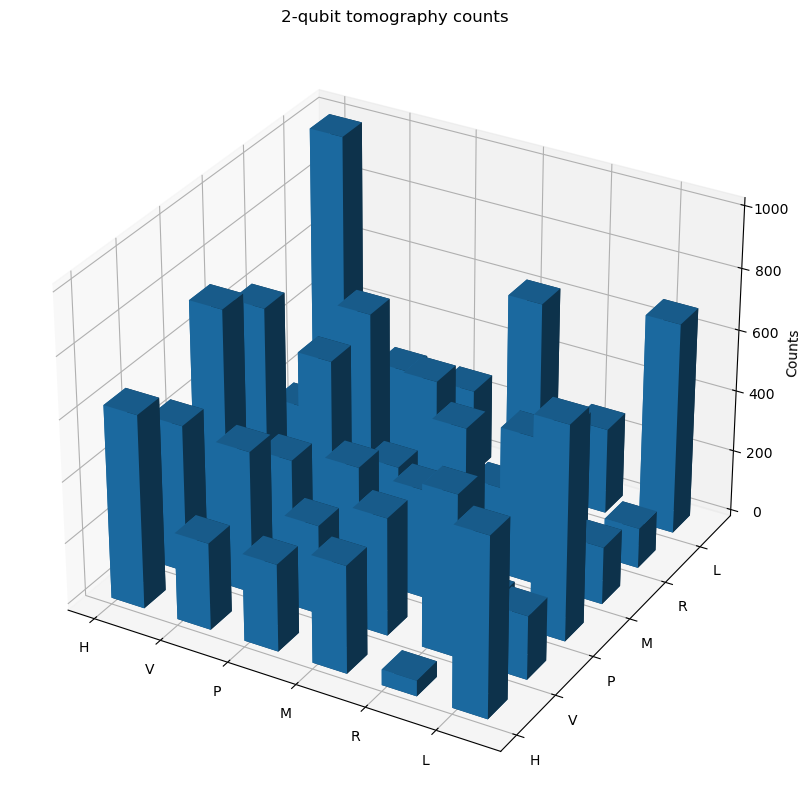

Text(0.5, 1.0, '1-qubit tomography count')

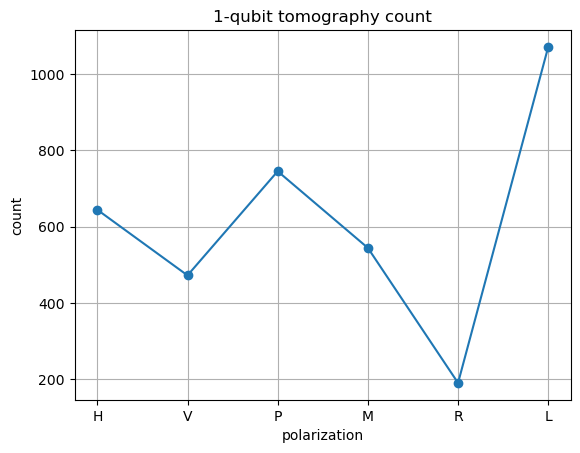

In [ ]:
print("-------------\n  Tomography  \n-------------\n")
print("-------------\n   1-qubit  \n-------------\n")

counts_tomo_1 = [644, 472, 745, 544, 190, 1071]

density_matrix_1_qubit = density_matrix_one_photon(counts_tomo_1)
print(density_matrix_1_qubit)

print("\n\n-------------\n   2-qubit  \n-------------\n")

counts_tomo_2 = [[629,	283,	284,	350,	51,	584],
[482	    ,463	,290	,383	,527,	207],
[749	    ,321	,364	,354	,65	,   698],
[647	    ,535	,250	,444	,480,	187],
[209	    ,583	,423	,131	,394,	131],
[1004       ,285	,281	,633	,280,	689]
]
density_matrix_2_qubit = density_matrix_two_photon(counts_tomo_2)
print(str(np.round(density_matrix_2_qubit[0][0],5)) + "\t\t" + str(np.round(density_matrix_2_qubit[0][1],5)) + "\t" + str(np.round(density_matrix_2_qubit[0][2],5)) + "\t" + str(np.round(density_matrix_2_qubit[0][3],5)) )
print(str(np.round(density_matrix_2_qubit[1][0],5)) + "\t" + str(np.round(density_matrix_2_qubit[1][1],5)) + "\t" + str(np.round(density_matrix_2_qubit[1][2],5)) + "\t" + str(np.round(density_matrix_2_qubit[1][3],5)) )
print(str(np.round(density_matrix_2_qubit[2][0],5)) + "\t" + str(np.round(density_matrix_2_qubit[2][1],5)) + "\t" + str(np.round(density_matrix_2_qubit[2][2],5)) + "\t" + str(np.round(density_matrix_2_qubit[2][3],5)) )
print(str(np.round(density_matrix_2_qubit[3][0],5)) + "\t\t" + str(np.round(density_matrix_2_qubit[3][1],5)) + "\t" + str(np.round(density_matrix_2_qubit[3][2],5)) + "\t" + str(np.round(density_matrix_2_qubit[3][3],5)) )


data_array = np.array(counts_tomo_2)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]),
                              np.arange(data_array.shape[0]) )

x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = data_array.flatten()
ax.bar3d( x_data,
          y_data,
          np.zeros(len(z_data)),
          0.5, 0.5, z_data)
polarization = ['X', 'H', 'V', 'P', 'M', 'R', 'L']
ax.set_xticklabels(polarization)
ax.set_yticklabels(polarization)
ax.set_zlabel("Counts")
ax.set_title("2-qubit tomography counts")

plt.show()

plt.plot(polarization[1::], counts_tomo_1, 'o-')
plt.xlabel("polarization")
plt.ylabel("count")
plt.grid()
plt.title("1-qubit tomography count")

# 3c.

## Part I

In [255]:
import random

def beam_of_photons(flux, integration_time_window):
    return np.random.poisson(integration_time_window*flux, np.int64(np.ceil(1/integration_time_window))).tolist()

def g_second_order_correlation_heralded(flux, integration_time):
    beam1_source = beam_of_photons(flux, integration_time)
    beam2_source = beam_of_photons(flux, integration_time)
    
    beam1 = beam1_source
    beam2 = []
    beam3 = []
    for element in beam2_source:
        noise = random.randint(0,1)
        if (random.randint(0,1)):
            beam2.append(element)
            beam3.append(0 + noise)
        else:
            beam3.append(element)
            beam2.append(0 + noise)
    

    N1 = 0
    N2 = 0
    N12 = 0
    N13 = 0
    N23 = 0
    N123 = 0
    for n1,n2,n3 in zip(beam1,beam2, beam3):
        N1 = N1 + n1
        N2 = N2 + n2
        N12 = N12 + min([n1,n2])
        N13 = N13 + min([n1,n3])
        N23 = N23 + min([n2,n3])
        N123 = N123 + min([n1,n2,n3])

    g2 = (N123*N1/(N12*N13))

    #print(N12)


    return g2

flux = 10**4
integration_time = 10**(-6)
run_time = 50 #integer in seconds

''' 
function runs here
'''
print("Running the g2 iteration "+str(run_time)+" times")

g2_list = []
for i in range(run_time):
    g_val = g_second_order_correlation_heralded(flux=flux, integration_time=integration_time)
    g2_list.append(g_val)

mean_g2 = np.mean(g2_list)
variance_g2 = np.std(g2_list)

print("The mean g2 is: "+str(mean_g2)+" and the variance is: "+str(variance_g2))

Running the g2 iteration 50 times
The mean g2 is: 0.07564784375436413 and the variance is: 0.008877037694572912


## Part II

Text(0.5, 1.0, 'Polarization correlation plot')

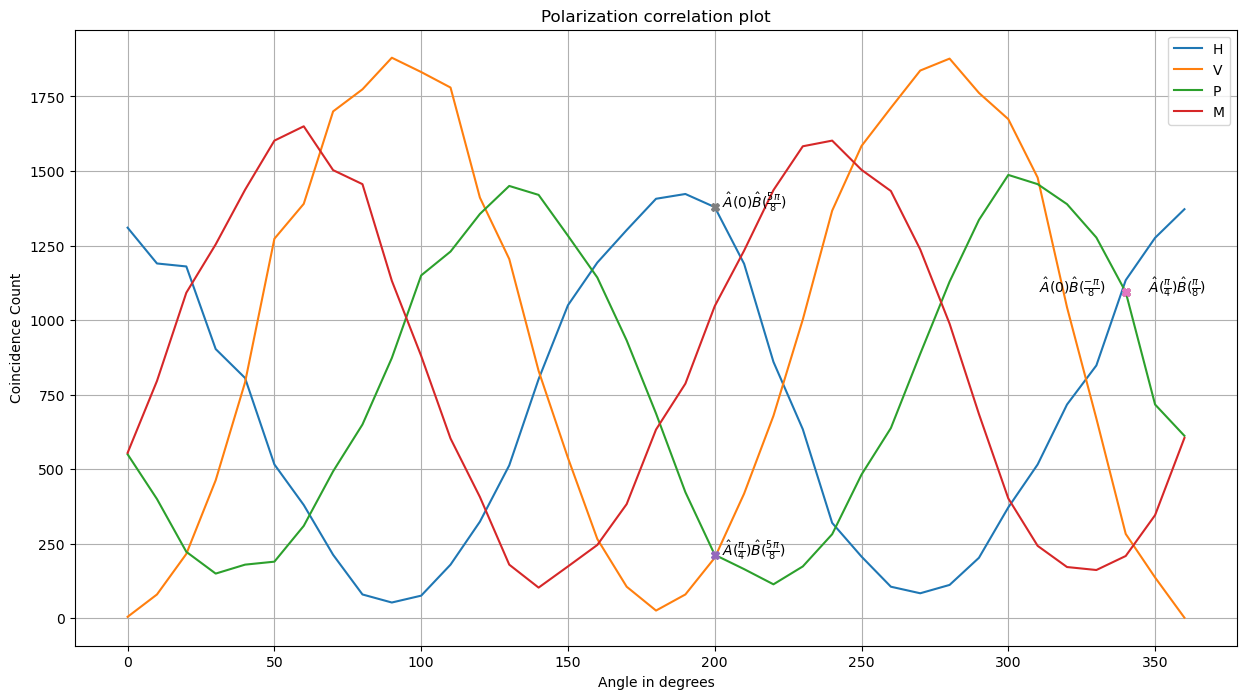

In [ ]:
angle_list = np.arange(0,370,10).tolist() 	        	                                    	        	        	        	        	        		    		    		    		        		    		    		        	        	        	        	                        	    
    	        	        	        	        		    		    		    		    		        		    		        	        
h_list = [1310, 1190, 1180, 903	, 806	, 516	, 380	, 213	, 80	 , 53	 , 76	 , 180	, 324	, 513	, 802	, 1050, 1193, 1302, 1407, 1423, 1379, 1189, 860	, 634	, 320	, 207	, 106	, 84	 , 112	, 203	, 372	, 516	, 717	, 848	, 1134, 1276, 1372]
v_list = [5	  , 80	 , 216	, 463	, 791	, 1273, 1390, 1700, 1774, 1880, 1832, 1780, 1411, 1205, 830	, 538	, 266	, 106	, 26	 , 80	 , 203	, 418	, 679	, 1002, 1367, 1584, 1712, 1837, 1877, 1762, 1674, 1478, 1043, 670	, 283	, 137	, 2	  ]
p_list = [550	, 400	, 223	, 150	, 180	, 190	, 310	, 493	, 650	, 873	, 1150, 1230, 1356, 1450, 1420, 1283, 1143, 932	, 687	, 423	, 213	, 165	, 114	, 174	, 282	, 482	, 638	, 887	, 1129, 1336, 1487, 1456, 1389, 1277, 1094, 717	, 612	]
m_list = [555, 796, 1092, 1254, 1437, 1602, 1650, 1503, 1456, 1132, 880, 603, 407, 180, 103, 174, 246, 383, 633, 787, 1047, 1233, 1436, 1583, 1602, 1504, 1433, 1237, 988, 685, 402, 243, 172, 162, 209, 346, 605]

fix, ax = plt.subplots(1, figsize=(15,8))

ax.plot(angle_list, h_list, '-', label = "H")
ax.plot(angle_list, v_list, '-', label = "V")
ax.plot(angle_list, p_list, '-', label = "P")
ax.plot(angle_list, m_list, '-', label = "M")
ax.set_xlabel("Angle in degrees")
ax.set_ylabel("Coincidence Count")
ax.grid()
ax.legend()

ax.annotate("$\hat{A}(\\frac{\pi}{4}) \hat{B}(\\frac{\pi}{8})$",(360-12.5,p_list[34]))
ax.annotate("$\hat{A}(0) \hat{B}(\\frac{-\pi}{8})$",(360-49.5,p_list[34]))
ax.annotate("$\hat{A}(\\frac{\pi}{4}) \hat{B}(\\frac{5\pi}{8})$",(202.5,p_list[20]))
ax.annotate("$\hat{A}(0) \hat{B}(\\frac{5\pi}{8})$",(202.5,h_list[20]))
ax.plot(200,p_list[20],'X')
ax.plot(360-20,p_list[34],'X')
ax.plot(340,p_list[34],'X')
ax.plot(200,h_list[20],'X')
ax.set_title("Polarization correlation plot")